<a href="https://colab.research.google.com/github/DavidAfdal/DavidAfdal/blob/main/malnutrisi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Helper Functions For Analysis


In [2]:
def numerical_distro(data,numerical_features):


    for feature in numerical_features:
        plt.figure(figsize=(12,5))

        plt.subplot(1,2,1)
        sns.histplot(data=data,x=data[feature],kde=True,bins=30)
        plt.xlabel(feature)
        plt.ylabel("Frequency")

        plt.subplot(1,2,2)
        sns.boxplot(data[feature])
        plt.title(f"Box Plot of  { feature } ")
        plt.tight_layout()
        plt.show()

        print(f"\nStatistics for {feature}:")
        print(f"Skewness: {data[feature].skew():.2f}")
        print(f"Missing Values: {data[feature].isnull().sum()}")

In [3]:
def categorical_distro(data,categorical_features,top_n = 10):
    for feature in categorical_features:
        unique_count = data[feature].nunique()

        if unique_count>top_n:
            top_categories =  data[feature].value_counts().nlargest(top_n)
            sns.barplot(x = top_categories.index,y = top_categories.values,palette='pastel')
            print(f"Top {top_n} Categories of {feature}")
        else:
            sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")
            plt.title(f"Distribution of {feature}")

        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

        # Print stats
        print(f"Feature: {feature}")
        print(f"Number of Unique Values: {unique_count}")
        print(f"Missing Values: {data[feature].isnull().sum()}\n")

## Importing the dataset

In [4]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(dataset.head())

  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)  Berat Badan (kg)  \
0     Laki-laki            19               91.6              13.3   
1     Laki-laki            20               77.7               8.5   
2     Laki-laki            10               79.0              10.3   
3     Perempuan             2               50.3               8.3   
4     Perempuan             5               56.4              10.9   

           Stunting             Wasting  
0              Tall  Risk of Overweight  
1           Stunted         Underweight  
2            Normal  Risk of Overweight  
3  Severely Stunted  Risk of Overweight  
4  Severely Stunted  Risk of Overweight  


In [6]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB
None


In [7]:
print(dataset.isnull().sum())

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Berat Badan (kg)     0
Stunting             0
Wasting              0
dtype: int64


## Grafik Data

In [8]:
numerical_cols = ["Umur (bulan)", "Tinggi Badan (cm)", "Berat Badan (kg)"]

categorical_cols = ["Jenis Kelamin", "Stunting", "Wasting"]

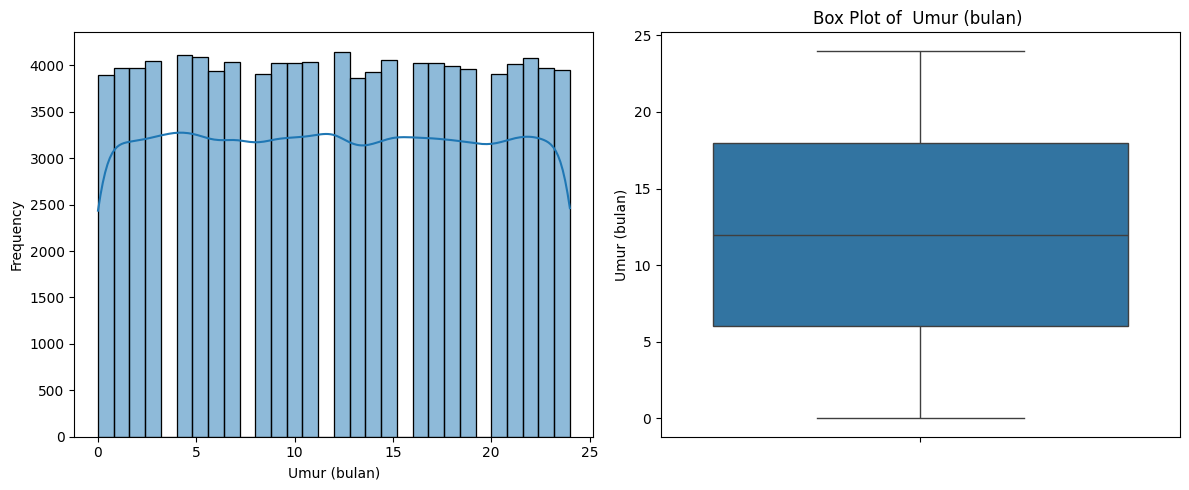


Statistics for Umur (bulan):
Skewness: 0.00
Missing Values: 0


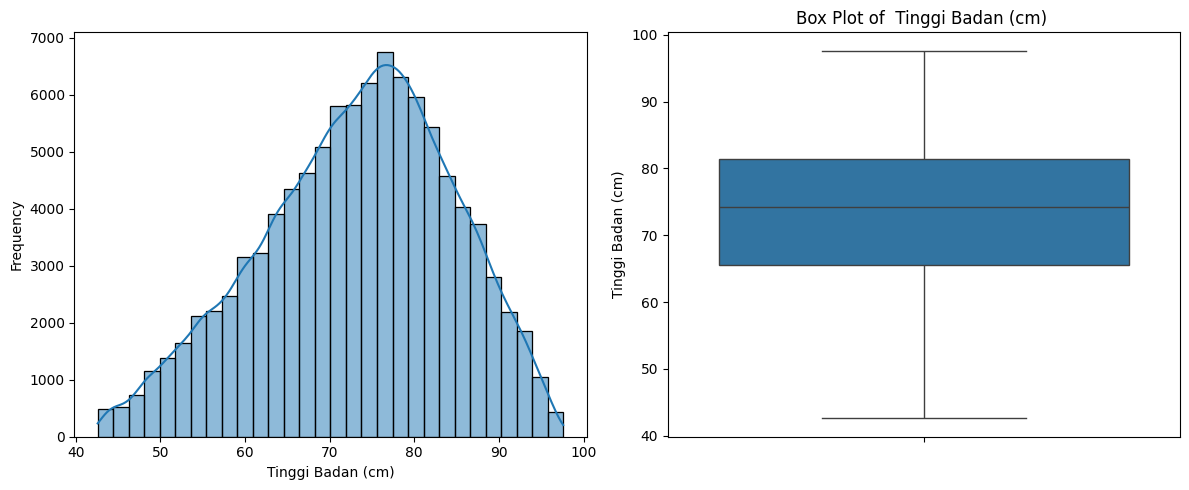


Statistics for Tinggi Badan (cm):
Skewness: -0.31
Missing Values: 0


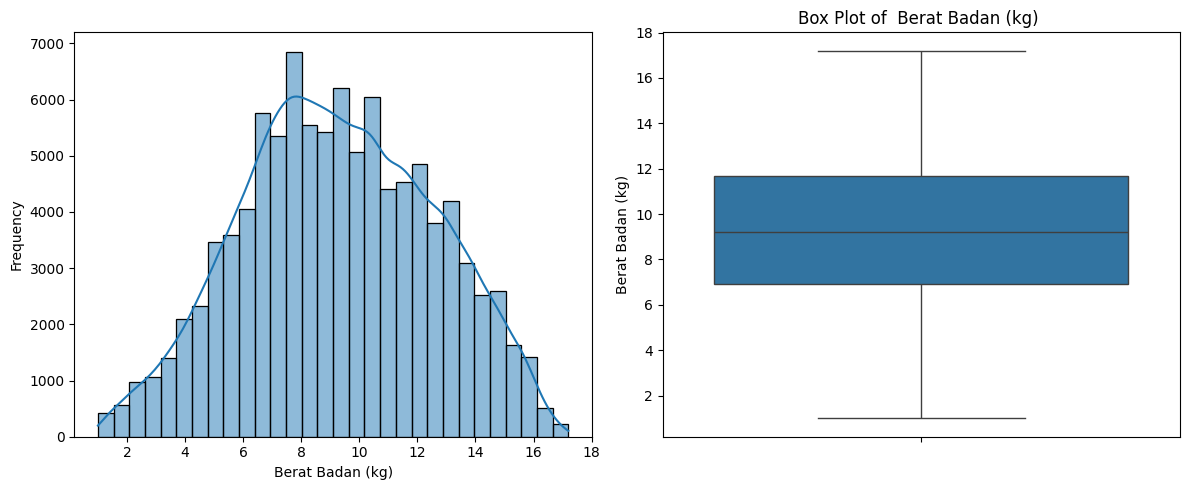


Statistics for Berat Badan (kg):
Skewness: -0.00
Missing Values: 0


In [9]:
numerical_distro(dataset,numerical_cols)

<ipython-input-3-0b76dbb245ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")


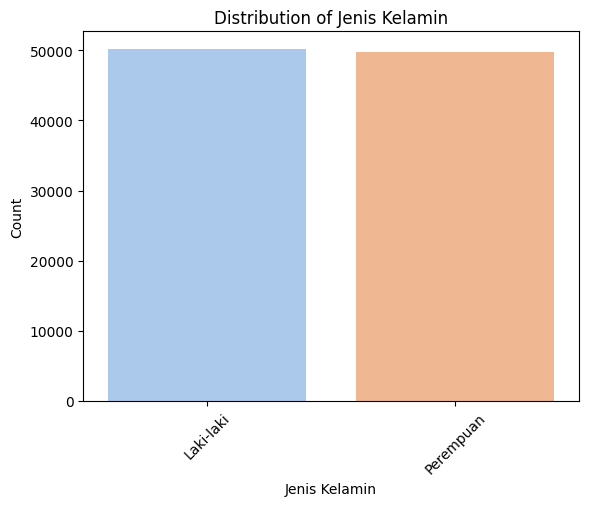

Feature: Jenis Kelamin
Number of Unique Values: 2
Missing Values: 0



<ipython-input-3-0b76dbb245ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")


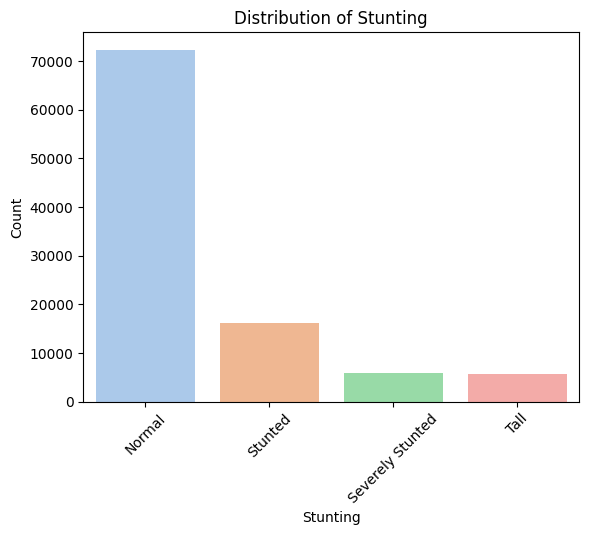

Feature: Stunting
Number of Unique Values: 4
Missing Values: 0



<ipython-input-3-0b76dbb245ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], order=data[feature].value_counts().index, palette="pastel")


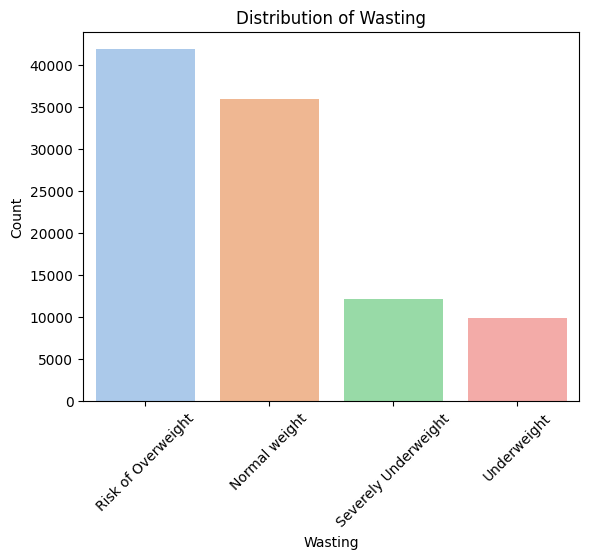

Feature: Wasting
Number of Unique Values: 4
Missing Values: 0



In [10]:
categorical_distro(dataset,categorical_cols)

## Encoding the Independent Variable

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
column_transformer = ColumnTransformer(
    transformers=[
        ('gender', OneHotEncoder(), [0]),
        ('stunting', OneHotEncoder(), [4])
    ],
    remainder='passthrough'
)

X = column_transformer.fit_transform(X)

In [13]:
print(X)

[[1.0 0.0 0.0 ... 19 91.6 13.3]
 [1.0 0.0 0.0 ... 20 77.7 8.5]
 [1.0 0.0 1.0 ... 10 79.0 10.3]
 ...
 [0.0 1.0 1.0 ... 18 82.9 12.6]
 [1.0 0.0 1.0 ... 7 73.6 5.5]
 [1.0 0.0 1.0 ... 17 88.8 6.7]]



## Encoding the Dependent Variable


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y= le.fit_transform(y)

In [33]:
print(y)

[1 3 1 ... 1 2 2]


## Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
print(X_train)

[[0.0 1.0 1.0 ... 18 76.8 12.3]
 [0.0 1.0 0.0 ... 24 75.7 15.3]
 [0.0 1.0 1.0 ... 24 86.4 13.8]
 ...
 [1.0 0.0 1.0 ... 3 62.5 6.2]
 [1.0 0.0 0.0 ... 24 78.8 13.3]
 [1.0 0.0 0.0 ... 22 80.9 9.3]]


In [16]:
print(y_train)

[1 1 1 ... 0 1 3]


In [17]:
print(X_test)

[[0.0 1.0 1.0 ... 17 82.9 6.2]
 [1.0 0.0 1.0 ... 3 59.5 3.6]
 [1.0 0.0 1.0 ... 13 77.5 11.1]
 ...
 [0.0 1.0 1.0 ... 3 58.1 4.5]
 [0.0 1.0 0.0 ... 6 60.6 11.3]
 [0.0 1.0 1.0 ... 10 71.9 8.4]]


In [18]:
print(y_test)

[2 2 1 ... 0 1 0]


## Feature Scalling


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Implementation Model


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'ANN': Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])
}

models['ANN'].compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    if model_name == 'ANN':
        model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
        y_pred = model.predict(X_test)
        y_pred_class = np.argmax(y_pred, axis=1)
        accuracy = accuracy_score(y_test, y_pred_class)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Logistic Regression...
Logistic Regression Accuracy: 0.8496
Training KNN...
KNN Accuracy: 0.9789
Training Random Forest...
Random Forest Accuracy: 0.9980
Training ANN...
Epoch 1/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7651 - loss: 0.5841 - val_accuracy: 0.9506 - val_loss: 0.1434
Epoch 2/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9541 - loss: 0.1298 - val_accuracy: 0.9623 - val_loss: 0.1043
Epoch 3/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9639 - loss: 0.0973 - val_accuracy: 0.9706 - val_loss: 0.0827
Epoch 4/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9703 - loss: 0.0803 - val_accuracy: 0.9772 - val_loss: 0.0666
Epoch 5/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9755 - loss: 0.0665 - val_accuracy: 0.9794 - val_loss: 0.0600
Epoch 6/50
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9764 - loss: 0.0617 - val_accuracy: 0.9772 - val_loss: 0.0577
Epoch 7/50
2344/2344 ━━━━━━━━━━━━━━━━━

## Model Accuracy Comparison

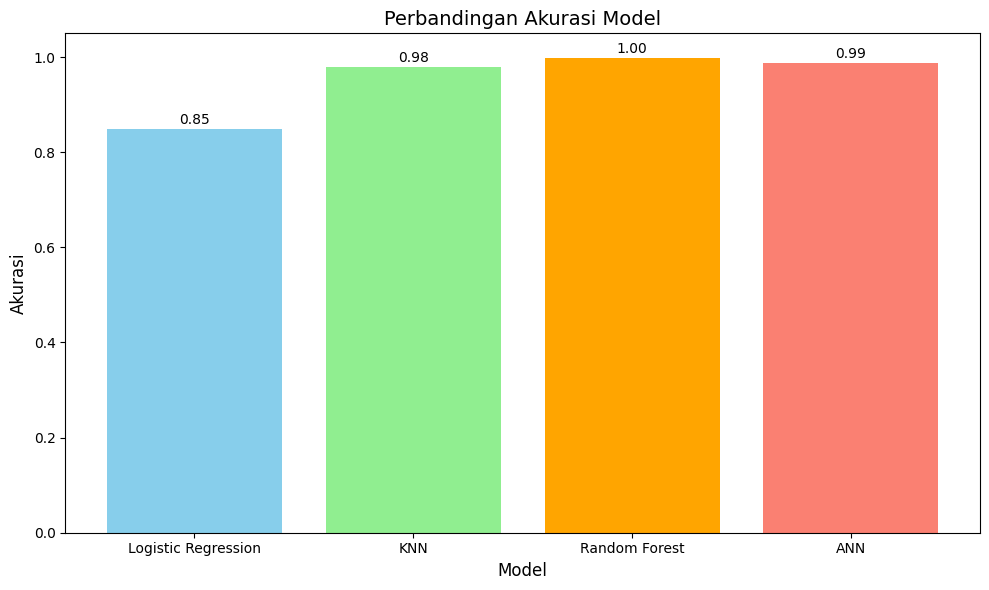

In [25]:
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.ylim(0, 1.05)
plt.title("Perbandingan Akurasi Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Akurasi", fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Confusion Matrix


Generating Confusion Matrix for Logistic Regression...


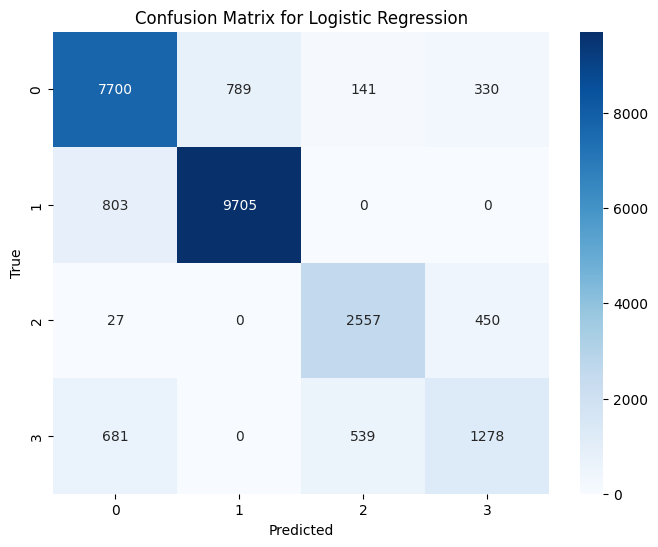


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      8960
           1       0.92      0.92      0.92     10508
           2       0.79      0.84      0.82      3034
           3       0.62      0.51      0.56      2498

    accuracy                           0.85     25000
   macro avg       0.79      0.78      0.79     25000
weighted avg       0.85      0.85      0.85     25000


Generating Confusion Matrix for KNN...


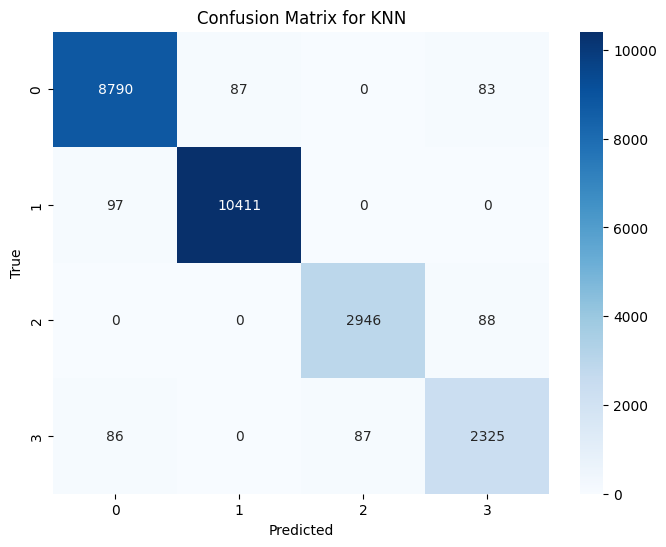


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8960
           1       0.99      0.99      0.99     10508
           2       0.97      0.97      0.97      3034
           3       0.93      0.93      0.93      2498

    accuracy                           0.98     25000
   macro avg       0.97      0.97      0.97     25000
weighted avg       0.98      0.98      0.98     25000


Generating Confusion Matrix for Random Forest...


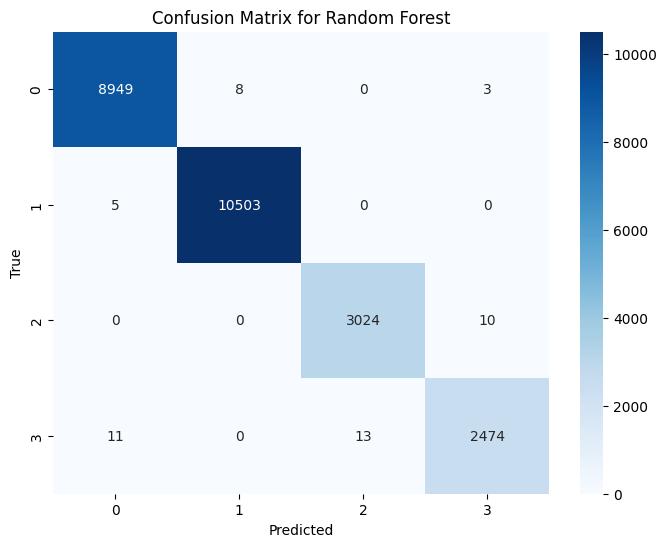


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8960
           1       1.00      1.00      1.00     10508
           2       1.00      1.00      1.00      3034
           3       0.99      0.99      0.99      2498

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000


Generating Confusion Matrix for ANN...
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


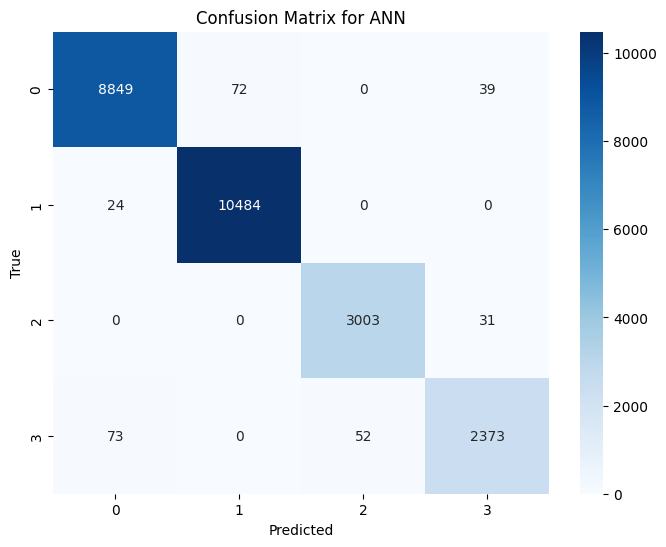


Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8960
           1       0.99      1.00      1.00     10508
           2       0.98      0.99      0.99      3034
           3       0.97      0.95      0.96      2498

    accuracy                           0.99     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.99      0.99      0.99     25000



In [32]:
from sklearn.metrics import confusion_matrix, classification_report

for model_name, model in models.items():
    print(f"\nGenerating Confusion Matrix for {model_name}...")

    if model_name == 'ANN':
        y_pred = model.predict(X_test)
        y_pred_class = np.argmax(y_pred, axis=1)
    else:
        y_pred_class = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred_class)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    report = classification_report(y_test, y_pred_class, target_names=[str(cls) for cls in np.unique(y_test)])
    print(f"\nClassification Report for {model_name}:\n{report}")

## Model Predictions on New Sample

In [30]:
data_baru = pd.DataFrame([{
    'Jenis Kelamin': 'Laki-laki',
    'Umur (bulan)': 11,
    'Tinggi Badan (cm)': 71.5,
    'Berat Badan (kg)': 136,
    'Stunting': 'Normal'
}])


data_baru = column_transformer.transform(data_baru)

print("=== Prediction for New Data ===\n")
for model_name, model in models.items():
    if model_name == 'ANN':
        pred = model.predict(data_baru)
        pred_class = np.argmax(pred, axis=1)
    else:
        pred_class = model.predict(data_baru)

    label = le.inverse_transform(pred_class)
    print(f"{model_name} Prediction: {label[0]}")

=== Prediction for New Data ===

Logistic Regression Prediction: Risk of Overweight
KNN Prediction: Risk of Overweight
Random Forest Prediction: Risk of Overweight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
ANN Prediction: Risk of Overweight


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
